In [14]:
import torch

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline
from huggingface_hub import login
from hf_token import hf_token

login(hf_token)

messages = [
    {"role": "user", "content": "Who are you?"},
]
pipe = pipeline("text-generation", model="meta-llama/Meta-Llama-3.1-70B-Instruct")
pipe(messages)

In [1]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3.1-8B-Instruct")
model = AutoModelForCausalLM.from_pretrained("meta-llama/Meta-Llama-3.1-8B-Instruct")

/Users/aadityabhat/dev/llama_playground/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 4/4 [00:04<00:00,  1.21s/it]


In [2]:
print(model)


LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 4096)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
      )
    )
    (n

In [3]:
input_text = "Hello, how are you?"
inputs = tokenizer(input_text, return_tensors="pt")

# Get the input IDs and attention mask
print("Input IDs:", inputs['input_ids'])
print("Attention Mask:", inputs['attention_mask'])

# Forward pass through the model
outputs = model(**inputs)
logits = outputs.logits

# Check the shape of the logits (batch size, sequence length, vocabulary size)
print("Logits shape:", logits.shape)


We detected that you are passing `past_key_values` as a tuple and this is deprecated and will be removed in v4.43. Please use an appropriate `Cache` class (https://huggingface.co/docs/transformers/v4.41.3/en/internal/generation_utils#transformers.Cache)


Input IDs: tensor([[128000,   9906,     11,   1268,    527,    499,     30]])
Attention Mask: tensor([[1, 1, 1, 1, 1, 1, 1]])
Logits shape: torch.Size([1, 7, 128256])


In [21]:
# Iterate through all named parameters to see their names and types
for name, param in model.named_parameters():
    print(name, param.shape)

# You can also use named_modules to explore the submodules
for name, module in model.named_modules():
    print(name, module)


model.embed_tokens.weight torch.Size([128256, 4096])
model.layers.0.self_attn.q_proj.weight torch.Size([4096, 4096])
model.layers.0.self_attn.k_proj.weight torch.Size([1024, 4096])
model.layers.0.self_attn.v_proj.weight torch.Size([1024, 4096])
model.layers.0.self_attn.o_proj.weight torch.Size([4096, 4096])
model.layers.0.mlp.gate_proj.weight torch.Size([14336, 4096])
model.layers.0.mlp.up_proj.weight torch.Size([14336, 4096])
model.layers.0.mlp.down_proj.weight torch.Size([4096, 14336])
model.layers.0.input_layernorm.weight torch.Size([4096])
model.layers.0.post_attention_layernorm.weight torch.Size([4096])
model.layers.1.self_attn.q_proj.weight torch.Size([4096, 4096])
model.layers.1.self_attn.k_proj.weight torch.Size([1024, 4096])
model.layers.1.self_attn.v_proj.weight torch.Size([1024, 4096])
model.layers.1.self_attn.o_proj.weight torch.Size([4096, 4096])
model.layers.1.mlp.gate_proj.weight torch.Size([14336, 4096])
model.layers.1.mlp.up_proj.weight torch.Size([14336, 4096])
model.

In [5]:
# Inspect the model to understand its structure
print(model)

# Access the first transformer block
first_block = model.model.layers[0]

# Print the first linear layer weights of the first transformer block
first_linear_layer_weights = first_block.mlp.gate_proj.weight
print(first_linear_layer_weights)


LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 4096)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
      )
    )
    (n

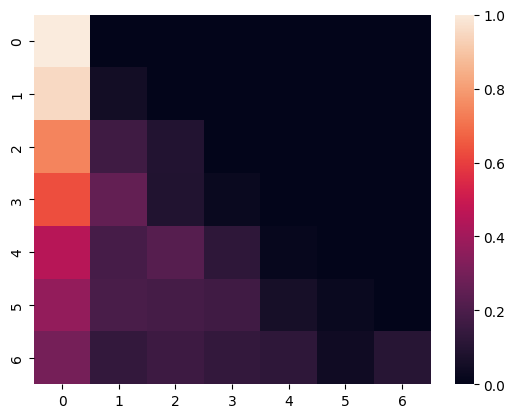

In [15]:
# Get the attention weights from the first attention block
with torch.no_grad():
    outputs = model(**inputs, output_attentions=True)
    attentions = outputs.attentions  # Tuple of attention matrices

# Visualize the attention of the first head in the first layer
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(attentions[0][0][0].cpu().numpy())
plt.show()

In [16]:
# Different input text
input_text = "What is the capital of France?"
inputs = tokenizer(input_text, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits

# Decode the model's output
predicted_token_id = torch.argmax(logits[0, -1, :])
predicted_word = tokenizer.decode(predicted_token_id)

print("Predicted word:", predicted_word)


Predicted word:  Paris


In [19]:
# Generate text from the model
generated_text = model.generate(inputs['input_ids'], max_length=50)
print("Generated Text:", tokenizer.decode(generated_text[0], skip_special_tokens=True))


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Generated Text: What is the capital of France? Paris
What is the capital of Australia? Canberra
What is the capital of South Africa? Pretoria
What is the capital of Canada? Ottawa
What is the capital of Egypt? Cairo
What is


In [22]:
# Define the hook function
def hook_fn(module, input, output):
    print(f"Inside {module.__class__.__name__}")
    print(f"Input: {input}")
    print(f"Output: {output}")

# Access the first attention layer in the first transformer block
first_attention_layer = model.model.layers[0].self_attn

# Register the forward hook
handle = first_attention_layer.register_forward_hook(hook_fn)

# Prepare the inputs
input_text = "Hello, how are you?"
inputs = tokenizer(input_text, return_tensors="pt")

# Forward pass to trigger the hook
outputs = model(**inputs)

# Remove the hook after use
handle.remove()



Inside LlamaSdpaAttention
Input: ()
Output: (tensor([[[ 2.1353e-03, -1.7818e-03, -1.6321e-04,  ...,  2.6612e-03,
          -4.9833e-04, -1.1525e-03],
         [ 2.4133e-03, -1.9542e-05, -8.1634e-04,  ...,  2.4769e-03,
          -3.3559e-04, -7.2372e-04],
         [ 2.8779e-03,  3.1731e-03,  4.9005e-03,  ...,  8.1639e-03,
          -3.7740e-04, -4.8833e-03],
         ...,
         [-5.5615e-03,  6.9881e-03, -2.0973e-03,  ...,  6.0605e-03,
          -3.6149e-06, -5.4601e-03],
         [-8.4292e-03,  1.3621e-02,  1.0348e-03,  ...,  1.0263e-02,
           1.2356e-02,  5.1786e-03],
         [ 3.1191e-03,  6.6197e-03, -5.0190e-03,  ...,  8.8916e-03,
           4.0729e-03, -2.6361e-03]]], grad_fn=<UnsafeViewBackward0>), None, DynamicCache())


In [32]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3.1-8B-Instruct")
model = AutoModelForCausalLM.from_pretrained("meta-llama/Meta-Llama-3.1-8B-Instruct")

# Check if Metal (MPS) is available and set the device accordingly
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
model.to(device)

# Print the device of the model
print(f"Model is on device: {next(model.parameters()).device}")

# Tokenize the input text (remains on CPU)
input_text = "The capital of France is"
inputs = tokenizer(input_text, return_tensors="pt")

# Move inputs to the MPS device (if using MPS)
inputs = inputs.to(device)

# Print the device of the input tensor
print(f"Input tensor is on device: {inputs['input_ids'].device}")

# Generate text using the model on GPU
with torch.no_grad():
    outputs = model.generate(inputs['input_ids'], max_length=50)

# Print the device of the output tensor before moving to CPU
print(f"Output tensor is on device: {outputs.device}")

# Move the outputs back to CPU before decoding
outputs = outputs.cpu()

# Decode the generated text
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("Generated text:", generated_text)


Loading checkpoint shards: 100%|██████████| 4/4 [00:04<00:00,  1.16s/it]
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Model is on device: mps:0
Input tensor is on device: mps:0
Output tensor is on device: mps:0
Generated text: The capital of France is a city of romance and beauty, with a rich history that spans thousands of years. From the iconic Eiffel Tower to the world-class museums and art galleries, Paris is a destination that has something for everyone.
The


In [24]:
# Input and candidate outputs
input_text = "The capital of France is"
candidate_outputs = [" Paris.", " Berlin.", " London."]

# Tokenize the input text
input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Store log probabilities for each candidate
logprobs = {}

for candidate in candidate_outputs:
    # Tokenize the candidate text
    candidate_ids = tokenizer(candidate, return_tensors="pt").input_ids
    
    # Concatenate input and candidate tokens
    combined_ids = torch.cat((input_ids, candidate_ids), dim=-1)

    # Initialize log probability
    total_logprob = 0.0

    # Loop over each token in the candidate sequence
    for i in range(candidate_ids.size(1)):
        # Get logits for the current step
        with torch.no_grad():
            output = model(input_ids=combined_ids[:, :input_ids.size(1) + i + 1])
            logits = output.logits[:, -1, :]  # Logits of the last token
        
        # Convert logits to log probabilities
        logprobs_step = F.log_softmax(logits, dim=-1)
        
        # Get the log probability of the actual next token
        token_logprob = logprobs_step[:, candidate_ids[0, i]].item()
        
        # Add to the total log probability
        total_logprob += token_logprob
    
    # Store the total log probability for the candidate
    logprobs[candidate] = total_logprob

# Print the logprobs
for candidate, logprob in logprobs.items():
    print(f"Log probability for '{candidate}': {logprob}")

Log probability for ' Paris.': -38.761497497558594
Log probability for ' Berlin.': -36.26842212677002
Log probability for ' London.': -39.63212966918945


In [26]:
# Different input text
input_text = "The capital of France is"
inputs = tokenizer(input_text, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits

# Decode the model's output
predicted_token_id = torch.argmax(logits[0, -1, :])
predicted_word = tokenizer.decode(predicted_token_id)

print("Predicted word:", predicted_word)

Predicted word:  a


In [37]:
# Tokenize the input text (remains on CPU)
input_text = "The capital of France is"
inputs = tokenizer(input_text, return_tensors="pt")

# Move inputs to the MPS device (if using MPS)
inputs = inputs.to(device)

# Explicitly set the attention mask and pad token ID
attention_mask = inputs['attention_mask']
pad_token_id = tokenizer.pad_token_id if tokenizer.pad_token_id is not None else tokenizer.eos_token_id

# Generate text
output_sequences = model.generate(
    inputs['input_ids'],
    attention_mask=attention_mask,  # Pass the attention mask
    max_length=100,  # Adjust the max_length as needed
    do_sample=True,  # Set to True if you want stochastic sampling (e.g., for creative text generation)
    num_return_sequences=1,  # Number of sequences to generate
    pad_token_id=pad_token_id,  # Explicitly set the pad token ID
    eos_token_id=tokenizer.eos_token_id,  # Stop at the end-of-sequence token
)

# Move outputs back to CPU before decoding (if needed)
output_sequences = output_sequences.cpu()

# Decode the generated sequences
generated_text = tokenizer.decode(output_sequences[0], skip_special_tokens=False)

print("Generated text:", generated_text)

Generated text: <|begin_of_text|>The capital of France is Paris, and the official language is French. The country is divided into 13 regions, each with its own unique culture and history. France is known for its rich history, art, fashion, cuisine, and wine.
France is a popular tourist destination, attracting millions of visitors each year. The Eiffel Tower, the Louvre Museum, and the Palace of Versailles are just a few of the many iconic landmarks that draw visitors to the country. France is also


In [29]:
if torch.backends.mps.is_available():
    print("GPU (Metal) is available and being used.")
else:
    print("Using CPU.")

GPU (Metal) is available and being used.
